# Importing Classical Libraries

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
import numpy as np
import pylatexenc

# Importing Quantum Computing Libraries

In [2]:
from qiskit.circuit.library import TwoLocal, ZZFeatureMap
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.utils import algorithm_globals
from qiskit_machine_learning.algorithms import VQC, QSVC
from qiskit_machine_learning.datasets import ad_hoc_data
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel


In [3]:
import pandas as pd

## Loading Dataset using pandas library

In [4]:
df=pd.read_csv('african_crises.csv')

## Label Encoding
### What is Label Encoding?
Label encoding converts categorical values into numerical values, allowing machine learning models to process them.


In [5]:
# Create a LabelEncoder object
le = LabelEncoder()

# Apply label encoding to categorical columns
for col in df.select_dtypes(include=['object']).columns:
  df[col] = le.fit_transform(df[col])

# Display the updated DataFrame
df.head(5)

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,3,0,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,0
1,1,3,0,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,1
2,1,3,0,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,1
3,1,3,0,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,1
4,1,3,0,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,1


In [10]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df' is your DataFrame
scaler = MinMaxScaler()

# Scale the column
df[['inflation_annual_cpi_scaled']] = scaler.fit_transform(df[['inflation_annual_cpi']])
df[['exch_usd_scaled']] = scaler.fit_transform(df[['exch_usd']])
df.drop(['inflation_annual_cpi', 'exch_usd'], axis=1, inplace=True)


In [11]:
df

,case,cc3,country,year,systemic_crisis,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,independence,currency_crises,inflation_crises,banking_crisis,inflation_annual_cpi_scaled,exch_usd_scaled
0,1,3,0,1870,1,0,0,0.0,0,0,0,0,1.452660e-06,0.000070
1,1,3,0,1871,0,0,0,0.0,0,0,0,1,1.939600e-06,0.000071
2,1,3,0,1872,0,0,0,0.0,0,0,0,1,1.127051e-06,0.000070
3,1,3,0,1873,0,0,0,0.0,0,0,0,1,1.805663e-06,0.000069
4,1,3,0,1874,0,0,0,0.0,0,0,0,1,1.121141e-06,0.000069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,12,12,2009,1,1,1,0.0,1,1,0,0,9.473578e-07,0.476686
1055,70,12,12,2010,0,1,1,0.0,1,0,0,1,1.442453e-06,0.508124
1056,70,12,12,2011,0,1,1,0.0,1,0,0,1,1.519898e-06,0.486225
1057,70,12,12,2012,0,1,1,0.0,1,0,0,1,1.465327e-06,0.486225


# Splitting dataset into test and train groups

In [12]:
X=df.drop('banking_crisis',axis=1)
y=df['banking_crisis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

# Classical Machine Learning Models Implementation

In [13]:
models = [

    SVC(),
    RandomForestClassifier(),
]

for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"Model: {model.__class__.__name__}, Score: {score}")

Model: SVC, Score: 0.8943396226415095
Model: RandomForestClassifier, Score: 0.9773584905660377


# Plotting The Confusion Matrix

In [14]:
import matplotlib.pyplot as plt


models = [
    
    SVC(),
    RandomForestClassifier(),
]

for model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)

  print(f"Model: {model.__class__.__name__}")
  print(f"  Accuracy: {accuracy:.4f}")
  print(f"  F1 Score: {f1:.4f}")
  print(f"  Precision: {precision:.4f}")
  print(f"  Recall: {recall:.4f}")
  print("-" * 20)



Model: SVC
  Accuracy: 0.8943
  F1 Score: 0.9442
  Precision: 0.8943
  Recall: 1.0000
--------------------
Model: RandomForestClassifier
  Accuracy: 0.9774
  F1 Score: 0.9874
  Precision: 0.9793
  Recall: 0.9958
--------------------


# Analyzing Classical Results

## Model Comparison

| **Model** | **Accuracy** | **F1 Score** | **Precision** | **Recall** |
| --- | --- | --- | --- | --- |
| Support Vector Classifier (SVC) | 0.8943 | 0.9442 | 0.8943 | 1.0000 |
| Random Forest Classifier (RFC) | 0.9736 | 0.9854 | 0.9752 | 0.9958 |


In [15]:
#Creating copy for quantum Processing
np.random.seed(42)
dfq = df.sample(n=500).copy()

# Data Preparation For Quantum Machine Learning 

In [16]:
dfq

,case,cc3,country,year,systemic_crisis,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,independence,currency_crises,inflation_crises,banking_crisis,inflation_annual_cpi_scaled,exch_usd_scaled
576,40,6,7,1943,0,0,0,0.0,0,1,1,1,2.592506e-06,0.000672
312,19,4,3,1889,0,0,0,0.0,1,0,0,1,7.353310e-07,0.000269
70,1,3,0,2000,0,0,0,0.0,1,0,0,1,1.309800e-06,0.101226
682,45,8,8,1988,0,0,1,0.0,1,1,0,1,2.851929e-06,0.007192
896,63,9,10,2014,0,0,0,0.0,1,0,0,1,1.520080e-06,0.002502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,38,7,6,1955,0,0,0,0.0,0,0,0,1,1.281815e-06,0.006389
526,38,7,6,1968,0,0,0,0.0,1,0,0,1,1.538528e-06,0.007513
581,40,6,7,1948,0,0,0,0.0,0,0,1,1,3.121854e-06,0.001643
677,45,8,8,1983,0,0,0,0.0,1,0,0,1,2.306720e-06,0.001006


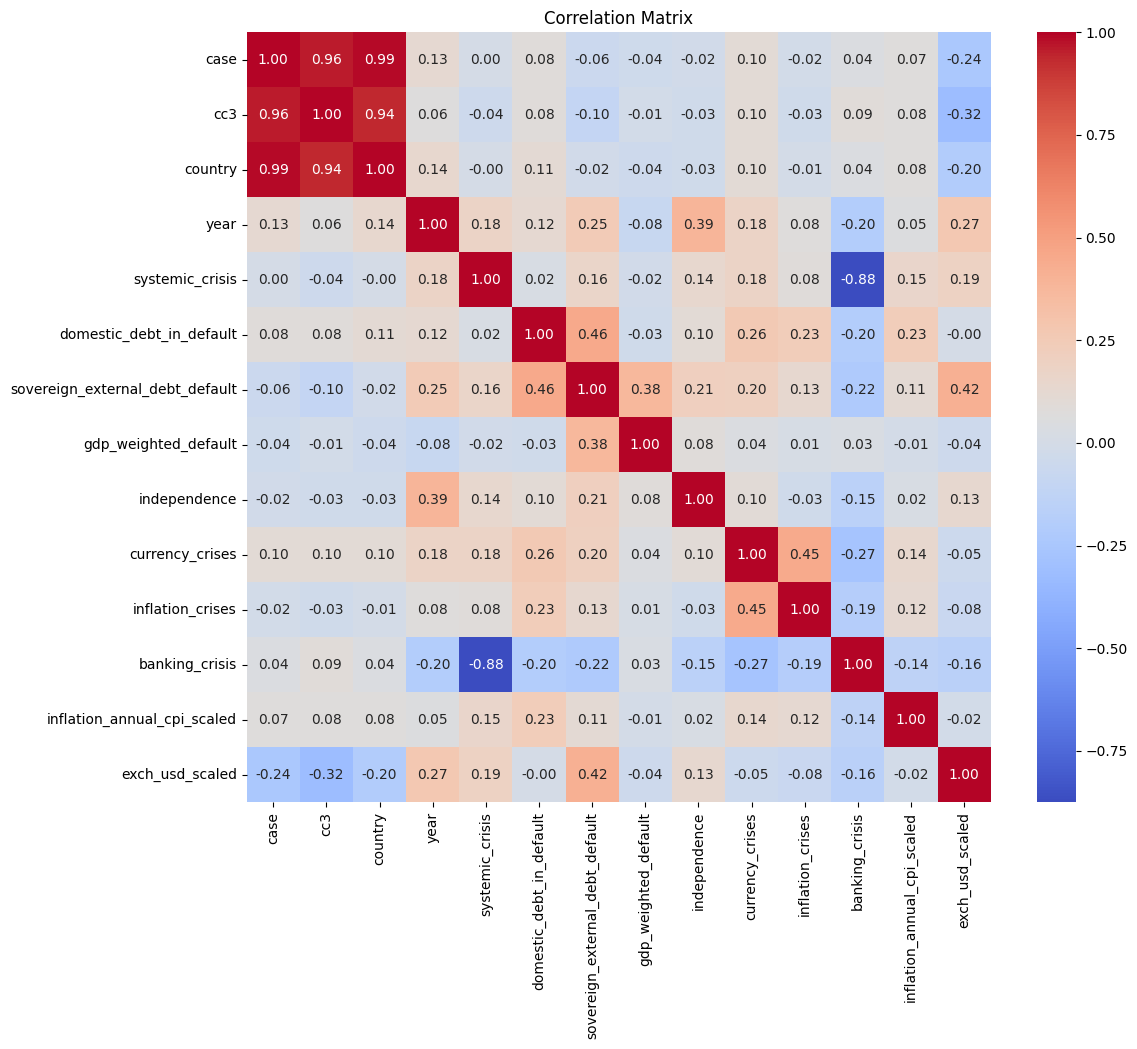

In [17]:
# Calculate the correlation matrix
correlation_matrix = dfq.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Feature Engineering to reduce Number of Features

I check the correlation heatmap to determine which features affect the banking crisis the most. I found that many features have a correlation of less than 0.2. I dropped those features and created new features by combining highly correlated features with the banking crisis.

In [18]:
# Assuming 'banking_crisis' as our target variable
target_variable = 'banking_crisis'

# Calculate the correlation of all features with 'banking_crisis'
correlation_with_target = dfq.corr()[target_variable].sort_values(ascending=False)

# Select features with high correlation (adjust threshold as needed)
highly_correlated_features = correlation_with_target[abs(correlation_with_target) > 0.25].index.tolist()

# Remove the target variable itself from the list
if target_variable in highly_correlated_features:
  highly_correlated_features.remove(target_variable)


# Create new features by combining highly correlated features
new_features = []
for feature in highly_correlated_features:
    new_feature_name = f"{feature}_x_{target_variable}"
    dfq[new_feature_name] = dfq[feature] * dfq[target_variable]
    new_features.append(new_feature_name)


# Create a new DataFrame with the new features and the target variable
new_dfq = dfq[[*new_features, target_variable]].copy()

print("Original DataFrame shape:", dfq.shape)
print("New DataFrame shape:", new_dfq.shape)
print("New Features:", new_features)


Original DataFrame shape: (500, 16)
New DataFrame shape: (500, 3)
New Features: ['currency_crises_x_banking_crisis', 'systemic_crisis_x_banking_crisis']


In [22]:
dfq_seperated=dfq['exch_usd_scaled']

In [24]:
final_dfq = pd.concat([new_dfq, dfq_seperated], axis=1)

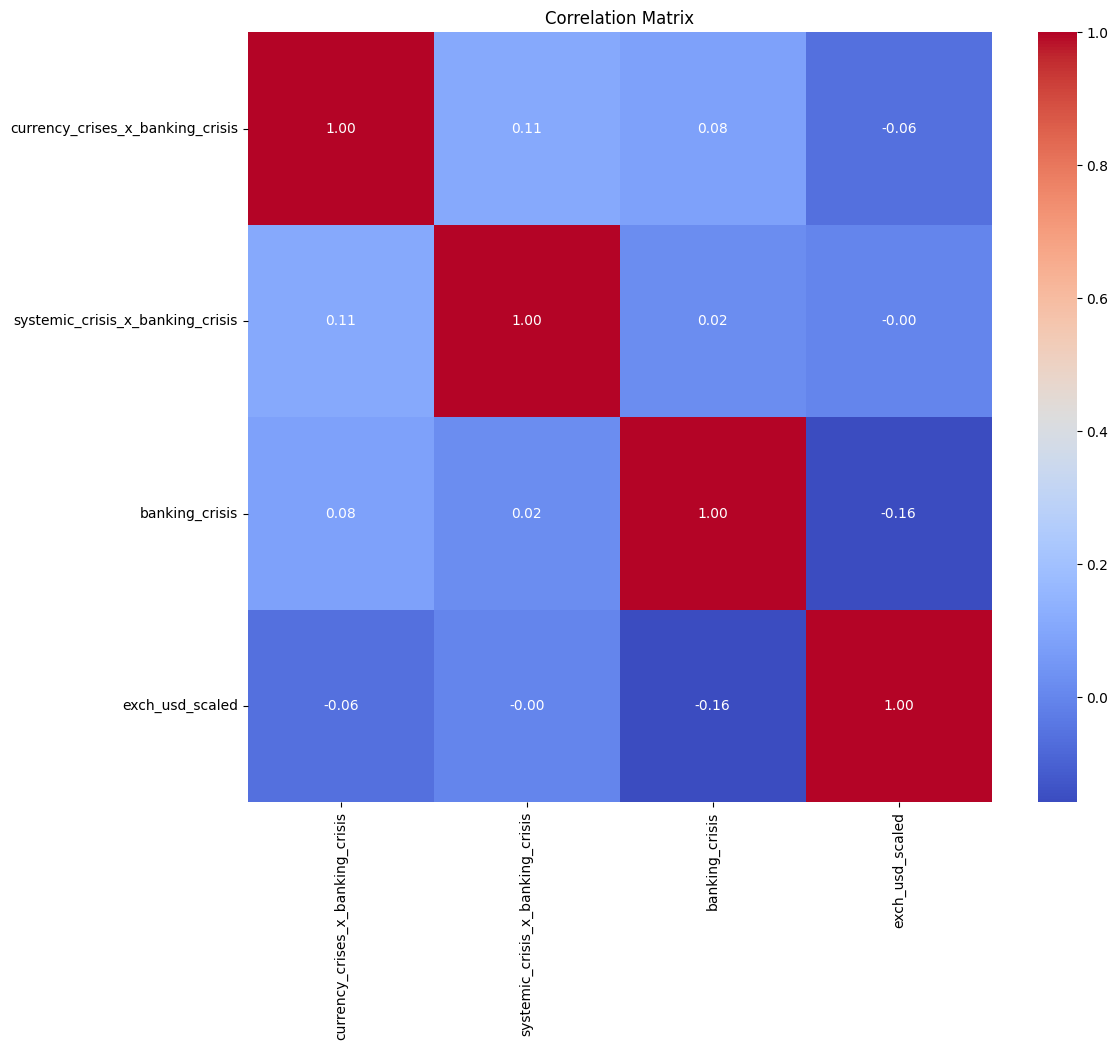

In [25]:
correlation_matrix = final_dfq.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [26]:
final_dfq

,currency_crises_x_banking_crisis,systemic_crisis_x_banking_crisis,banking_crisis,exch_usd_scaled
576,1,0,1,0.000672
312,0,0,1,0.000269
70,0,0,1,0.101226
682,1,0,1,0.007192
896,0,0,1,0.002502
...,...,...,...,...
513,0,0,1,0.006389
526,0,0,1,0.007513
581,0,0,1,0.001643
677,0,0,1,0.001006


In [27]:
X=final_dfq.drop('banking_crisis',axis=1)
y=final_dfq['banking_crisis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

In [28]:
X_train

,currency_crises_x_banking_crisis,systemic_crisis_x_banking_crisis,exch_usd_scaled
104,0,0,3.372268e-11
1036,1,0,6.771407e-29
336,0,0,2.696471e-04
88,0,0,2.794549e-11
833,0,0,4.695648e-01
...,...,...,...
1012,0,0,9.592827e-30
880,0,0,1.479230e-03
660,0,0,0.000000e+00
532,0,0,7.627775e-03


In [29]:
training_features = X_train.values
training_labels = y_train.values
test_features = X_test.values
test_labels = y_test.values

In [30]:
training_features

array([[0.00000000e+00, 0.00000000e+00, 3.37226830e-11],
       [1.00000000e+00, 0.00000000e+00, 6.77140727e-29],
       [0.00000000e+00, 0.00000000e+00, 2.69647111e-04],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 7.62777533e-03],
       [0.00000000e+00, 0.00000000e+00, 9.59658886e-03]])

In [31]:
print(f"Length of training features: {len(training_features)}")
print(f"Length of training labels: {len(training_labels)}")
print(f"Length of test features: {len(test_features)}")
print(f"Length of test labels: {len(test_labels)}")

Length of training features: 375
Length of training labels: 375
Length of test features: 125
Length of test labels: 125


# Feature Map and Ansatz For Quantum ML


### Quantum Machine Learning Essentials
In classical machine learning, two key components are:
* Features: Representing data in a meaningful way.
* Model: Learning patterns from data.
In quantum machine learning, I have analogous components:
* Feature Map: Encoding classical data into quantum states.
* Ansatz: Optimization circuit to update parameters.
### Feature Map: 
1. Transforms classical data into quantum states.
2. Enables quantum processing of classical information.
### Ansatz: 
1. Updates parameters to minimize loss function.
2. Learns patterns from quantum-encoded data.


In [32]:
feature_dim = training_features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement="linear")
ansatz = TwoLocal(feature_map.num_qubits, ["ry", "rz"], "cz", reps=3)

## Number of Qubits:
Our modified dataset consists of 2 features, which are encoded onto 2 qubits in our feature map

# Feature Map Display

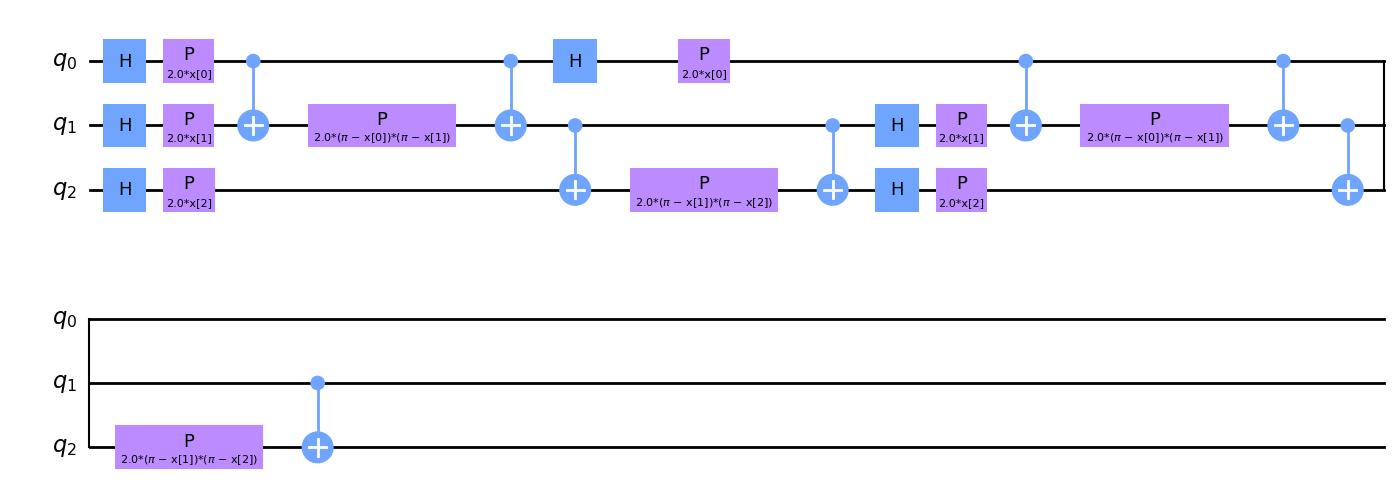

In [33]:
feature_map.decompose().draw(output="mpl", style="clifford", fold=20)

# Ansatz Display

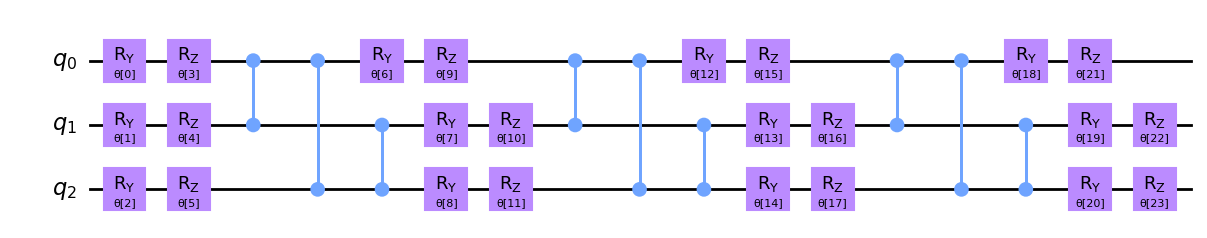

In [34]:
ansatz.decompose().draw(output="mpl", style="clifford", fold=20)


# Model No 1:
## VQC (Variational Quantum Classifier)
VQC is a quantum machine learning algorithm that combines classical and quantum computing to classify data.
### Components:
#### Feature Map: 
Encodes classical data into quantum states.
#### Ansatz: 
Parameterized quantum circuit to update parameters.
#### Optimizer: 
Classical optimization algorithm to minimize loss.
### Workflow:
#### Initialization:
* Define feature map, ansatz, and optimizer.
* Initialize VQC model.
#### Training:
* Fit VQC model to training data (vqc.fit()).
* Optimizer updates parameters to minimize loss.
#### Testing:
* Evaluate VQC model on test data (vqc.score()).
* Calculate accuracy.

In [35]:
optimizer = COBYLA(maxiter=50)
sampler = Sampler()
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(Iights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()


C:\Users\SURFACE\AppData\Local\Temp\ipykernel_3896\1395080852.py:2: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


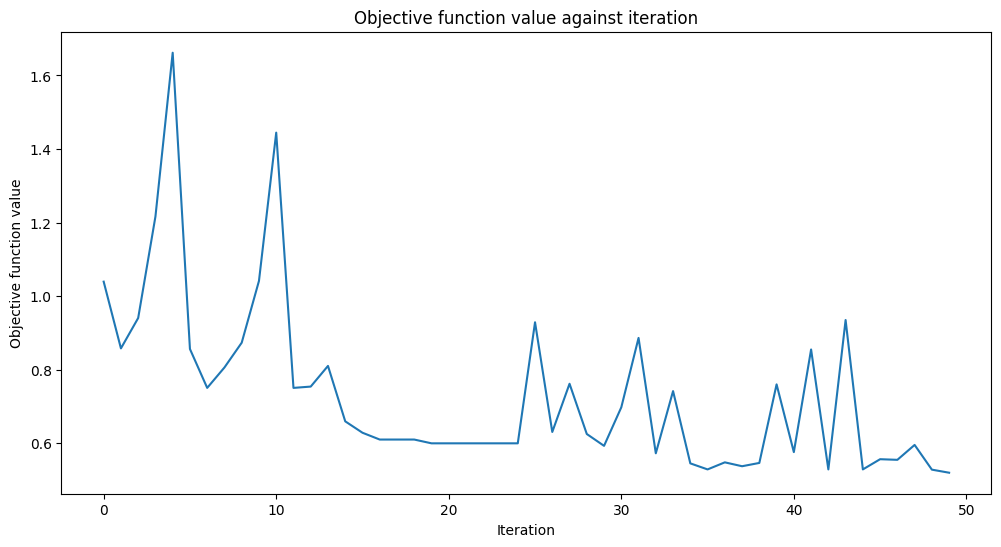

Training time: 105 seconds
Testing accuracy: 0.84


In [36]:
import time
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(training_features, training_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")
score = vqc.score(test_features, test_labels)
print(f"Testing accuracy: {score:0.2f}")

In [37]:
training_predictions = vqc.predict(training_features)
training_accuracy = accuracy_score(training_labels, training_predictions)
training_f1 = f1_score(training_labels, training_predictions)
training_recall = recall_score(training_labels, training_predictions)


print(f"Training accuracy: {training_accuracy:0.2f}")
print(f"Training F1 score: {training_f1:0.2f}")
print(f"Training Recall: {training_recall:0.2f}")


Training accuracy: 0.86
Training F1 score: 0.92
Training Recall: 0.93


# VQC Results (Simulation)
## Overview
The results indicate the performance of the Variational Quantum Classifier (VQC) on both training and testing datasets.
## Metrics
* Accuracy: Proportion of correctly classified samples.
* F1 Score: Harmonic mean of precision and recall.
* Recall: Proportion of true positives among all actual positive samples.
## Results Analysis
### Training Metrics
* Training Accuracy: 0.86 (86%)
* The model correctly classified 86% of the training samples.
* Training F1 Score: 0.92
* The model achieved a good balance betIen precision and recall.
* Training Recall: 0.93 (93 %)
* The model detected 93% of the actual positive samples.
* Testing Metric
# Testing Accuracy: 0.84 (84%)
* The model maintained its performance on unseen data.

# Model 2 QSVM
# Trainable Fiedilty Quantum Kernel

In [43]:
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit.visualization import circuit_drawer
from qiskit.circuit.library import ZZFeatureMap
from qiskit_algorithms.optimizers import SPSA
from qiskit_machine_learning.kernels import TrainableFidelityQuantumKernel
from qiskit_machine_learning.kernels.algorithms import QuantumKernelTrainer
from qiskit_machine_learning.algorithms import QSVC

In [44]:
class QKTCallback:
    """Callback wrapper class."""

    def __init__(self) -> None:
        self._data = [[] for i in range(5)]

    def callback(self, x0, x1=None, x2=None, x3=None, x4=None):
        """
        Args:
            x0: number of function evaluations
            x1: the parameters
            x2: the function value
            x3: the stepsize
            x4: whether the step was accepted
        """
        self._data[0].append(x0)
        self._data[1].append(x1)
        self._data[2].append(x2)
        self._data[3].append(x3)
        self._data[4].append(x4)

    def get_callback_data(self):
        return self._data

    def clear_callback_data(self):
        self._data = [[] for i in range(5)]

In [52]:
# Create a rotational layer to train. We will rotate each qubit the same amount.
training_params = ParameterVector("θ", 1)
fm0 = QuantumCircuit(3)
fm0.ry(training_params[0], 0)
fm0.ry(training_params[0], 1)
fm0.ry(training_params[0], 2)

# Use ZZFeatureMap to represent input data
fm1 = ZZFeatureMap(3)

# Create the feature map, composed of our two circuits
fm = fm0.compose(fm1)

print(circuit_drawer(fm))
print(f"Trainable parameters: {training_params}")

     ┌──────────┐┌───────────────────────────────┐
q_0: ┤ Ry(θ[0]) ├┤0                              ├
     ├──────────┤│                               │
q_1: ┤ Ry(θ[0]) ├┤1 ZZFeatureMap(x[0],x[1],x[2]) ├
     ├──────────┤│                               │
q_2: ┤ Ry(θ[0]) ├┤2                              ├
     └──────────┘└───────────────────────────────┘
Trainable parameters: θ, ['θ[0]']


In [53]:
# Instantiate quantum kernel
quant_kernel = TrainableFidelityQuantumKernel(feature_map=fm, training_parameters=training_params)

# Set up the optimizer
cb_qkt = QKTCallback()
spsa_opt = SPSA(maxiter=10, callback=cb_qkt.callback, learning_rate=0.05, perturbation=0.05)

# Instantiate a quantum kernel trainer.
qkt = QuantumKernelTrainer(
    quantum_kernel=quant_kernel, loss="svc_loss", optimizer=spsa_opt, initial_point=[np.pi / 2]
)

In [54]:
# Train the kernel using QKT directly
qka_results = qkt.fit(X_train, y_train)
optimized_kernel = qka_results.quantum_kernel
print(qka_results)

{   'optimal_circuit': None,
    'optimal_parameters': {   ParameterVectorElement(θ[0]): np.float64(1.5630783583658339)},
    'optimal_point': array([1.56307836]),
    'optimal_value': np.float64(67.99048343560527),
    'optimizer_evals': 30,
    'optimizer_result': None,
    'optimizer_time': None,
    'quantum_kernel': <qiskit_machine_learning.kernels.trainable_fidelity_quantum_kernel.TrainableFidelityQuantumKernel object at 0x000001DFAE000E60>}


In [55]:
from sklearn import metrics
# Use QSVC for classification
qsvc = QSVC(quantum_kernel=optimized_kernel)

# Fit the QSVC
qsvc.fit(X_train, y_train)

# Predict the labels
labels_test = qsvc.predict(X_test)

# Evalaute the test accuracy
accuracy_test = metrics.balanced_accuracy_score(y_true=y_test, y_pred=labels_test)
print(f"accuracy test: {accuracy_test}")

accuracy test: 0.5


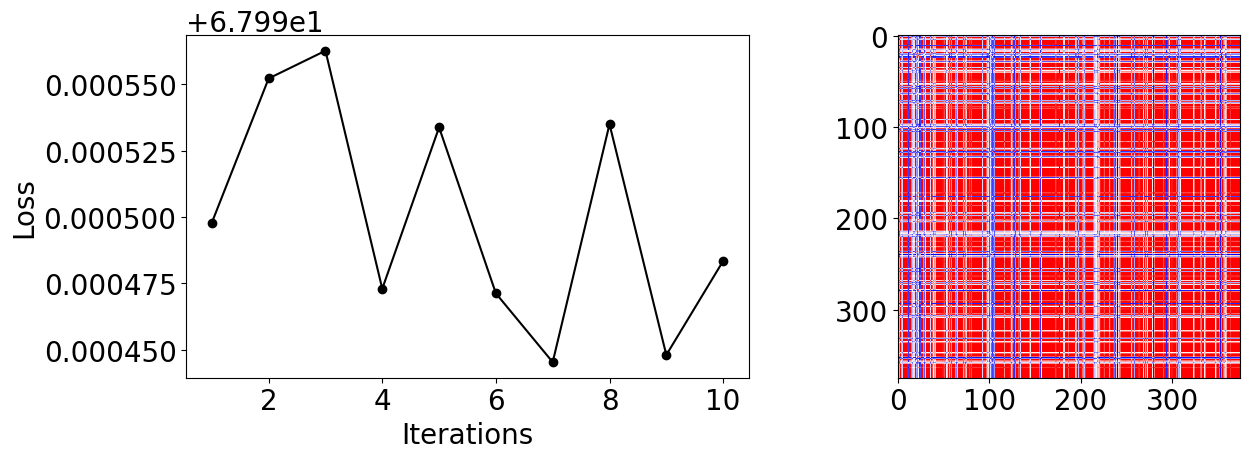

In [56]:
import matplotlib
plot_data = cb_qkt.get_callback_data()  # callback data
K = optimized_kernel.evaluate(X_train)  # kernel matrix evaluated on the training samples

plt.rcParams["font.size"] = 20
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot([i + 1 for i in range(len(plot_data[0]))], np.array(plot_data[2]), c="k", marker="o")
ax[0].set_xlabel("Iterations")
ax[0].set_ylabel("Loss")
ax[1].imshow(K, cmap=matplotlib.colormaps["bwr"])
fig.tight_layout()
plt.show()

In [60]:
from qiskit_ibm_runtime import Session
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel='ibm_quantum', token='f73393d0b4e099ab95417406a2c31844acdfaaf9373a2e0a3366ea247a6fb275652ea4d3fcb4ba2de1318577d3bced2d09aeb9610f761eaddb0a983d6b033661')
backend=service.least_busy()
session = Session(backend=backend)

qsvc = QSVC(quantum_kernel=optimized_kernel, backend=backend)

start = time.time()
# Fit QSVC
qsvc.fit(X_train, y_train)

# Predict labels
labels_test = qsvc.predict(X_test)

# Evaluate test accuracy
accuracy_test = metrics.balanced_accuracy_score(y_true=y_test, y_pred=labels_test)
print(f"Accuracy test: {accuracy_test}")
elapsed = time.time() - start

RequestsApiError: 'HTTPSConnectionPool(host=\'auth.quantum-computing.ibm.com\', port=443): Max retries exceeded with url: /api/version (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001DFAFFBD850>: Failed to resolve \'auth.quantum-computing.ibm.com\' ([Errno 11001] getaddrinfo failed)"))'

# Model No 3:

# Fidelity Kernel Based QSVC

## Quantum Kernel Algorithm Components
### 1. Sampler
Purpose: Generates samples from a quantum circuit.
Initialization: sampler = Sampler()
### 2. Fidelity
Definition: Measures the similarity betIen two quantum states.
ComputeUncompute: Calculates fidelity by comparing the original and uncomputed states.
Initialization: fidelity = ComputeUncompute(sampler=sampler)
### 3. Quantum Kernel
Definition: A quantum version of a classical kernel, enabling quantum machine learning.
FidelityQuantumKernel: Utilizes fidelity to construct a quantum kernel.
Initialization: q_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

In [105]:
sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

q_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

C:\Users\SURFACE\AppData\Local\Temp\ipykernel_3836\2568583920.py:1: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


# Implementation
I are going to implement a Quantum Support Vector Classification (QSVC) model, utilizing a previously constructed quantum kernel. It initializes the QSVC model, trains it on labeled training data, and evaluates its performance on test data. The model's test accuracy is then printed, providing insight into its classification capabilities. Essentially, this code leverages quantum computing to enhance classification accuracy, robustness, and efficiency, particularly in handling high-dimensional data. 

In [ ]:
qsvc = QSVC(
    quantum_kernel=q_kernel
)

start = time.time()
qsvc.fit(training_features, training_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

qsvc_score = qsvc.score(test_features, test_labels)

print(f"QSVC classification test score: {qsvc_score}")

Training time: 563 seconds


# Model No. 4: <br> Kernel PCA QSVC

In [28]:
matrix_train = q_kernel.evaluate(x_vec=training_features)
matrix_test = q_kernel.evaluate(x_vec=test_features, y_vec=training_features)

In [29]:
from sklearn.decomposition import KernelPCA

kernel_pca_q = KernelPCA(n_components=2, kernel="precomputed")
train_features_q = kernel_pca_q.fit_transform(matrix_train)
test_features_q = kernel_pca_q.transform(matrix_test)

In [30]:
# Train QSCV model on New Features
qsvc.fit(train_features_q, training_labels)

# Evaluate model
accuracy = qsvc.score(test_features_q, test_labels)
print("QSVC Accuracy:", accuracy)

QSVC Accuracy: 0.904


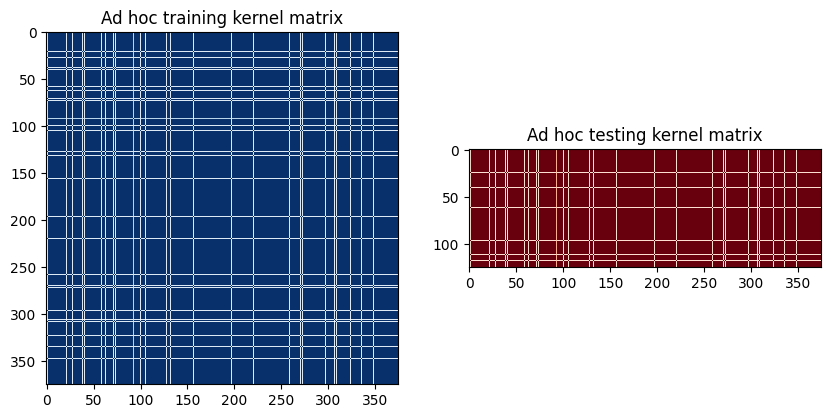

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(
    np.asmatrix(matrix_train), interpolation="nearest", origin="upper", cmap="Blues"
)
axs[0].set_title("training kernel matrix")

axs[1].imshow(np.asmatrix(matrix_test), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title("testing kernel matrix")

plt.show()

In [32]:
# from qiskit_ibm_runtime import Session
# from qiskit_ibm_runtime import SamplerV2 as Sampler
# from qiskit_ibm_runtime import QiskitRuntimeService

# service = QiskitRuntimeService(channel='ibm_quantum', token='f73393d0b4e099ab95417406a2c31844acdfaaf9373a2e0a3366ea247a6fb275652ea4d3fcb4ba2de1318577d3bced2d09aeb9610f761eaddb0a983d6b033661')
# backend=service.least_busy()

# with Session(backend=backend) as session:
#     sampler = Sampler(mode=session)
#     vqc = VQC(
#     sampler=sampler,
#     feature_map=feature_map,
#     ansatz=ansatz,
#     optimizer=optimizer
# )

# start = time.time()
# vqc.fit(training_features, training_labels)
# elapsed = time.time() - start

# print(f"Training time: {round(elapsed)} seconds")
# score = vqc.score(test_features, test_labels)
# print(f"Testing accuracy: {score:0.2f}")